# UTSA CS 3793/5233: Assignment-1

**Rivas - Isai - (nbf966)**






## Learning Objectives


*   Read data from a file and Create a graph
*   Implement Uninformed & Informed searching strategies
*   Apply different searching strategies for the given problem
*   Analyze and Compare the searching strategies


## Description

This assignment is focused on **python file reading, graph creation** and implementation of **search algorithms**.
In the following sections, you will complete a series of tasks for a made up problem of *Coronavirus in Texas*.

*   Coronavirus is non-discriminatory, in the sense that it can spread from one city to any other city. The only goal of the virus is to spread to all cities in Texas. Find a possible way for the virus to spread (Uninformed Search).
*   To counter the effect of the virus, vaccine needs to be distributed to all cities. One city has more demand than supply, whereas one city has a shortage of vaccines. The goal is to find an **optimal** strategy to transport the vaccine (Informed Search) from the city with high supply (low demand) to the city with low supply (high demand).

The base structure and comments are provided on what should be done. You can use some libraries that help support you for the successful completion of the assignment. However, you **CANNOT** use a complete library for the search algorithms. You can get pieces of code from online, but please cite the source properly.


#Reading Data Files & Creating a 2D Graph

##(45 points)

In this section, you will write code to read the data files provided, cities.csv and distances.csv, and create a 2D graph consisting of nodes and edges. The goal is to use this graph for the 2 search agents that you will create in the next section.

Provided with this lab, on Blackboard, you will find 2 csv files:

*   **cities.csv** - This file contains a list of coordinates for selected cities in Texas, in the following format:
```
San Antonio,29.4685,-98.5254
```
The above line means that San Antonio is located at the latitude and longitude of 29.4685 N and 98.5254 W respectively. Note that the '-ve' sign denotes 'S' for latitude and 'W' for longitude. While performing calculations you will need to ignore the sign.

*   **distances.csv** - This file contains distance values between two cities of Texas, if a path exists, in the following format:
```
San Antonio,New Braunfels,30.80876734
```
The above line denotes that there should be an edge between *San Antonio* and *New Braunfels* and the weight on that edge, i.e. the distance, is *30.80876734*.

In the code blocks below, handle the logic for the graph. Load the graph data from the give files and display a 2D graph of the given data, with labeled nodes and edges. Create as many functions or code blocks as needed.

##Extra Credit (4 points)

Overlay the 2D graph on an image of the Texas state map.





In [7]:
# Add only your imports here
import csv
from collections import defaultdict, deque
from google.colab import drive
drive.mount('/content/drive')
import networkx as nx
import matplotlib.pyplot as plt
import heapq


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
# Assume that the data files are in the following folder -- THIS WILL BE USED BY THE TA
basePath = "/content/drive/My Drive/Colab Notebooks/Artificial Intelligence/Data/"



In [9]:
# Load the graph data from the files
with open(basePath + 'cities.csv', 'r') as file:
  cities = [row[0] for row in csv.reader(file)]

graph = defaultdict(set)

with open(basePath + 'distances.csv', 'r') as file:
    reader = csv.reader(file)
    for row in reader:
        city1, city2 = row[:2] # We only need the first two columns (city names)
        graph[city1].add(city2)
        graph[city2].add(city1) # We do this twice because the graph is undirected

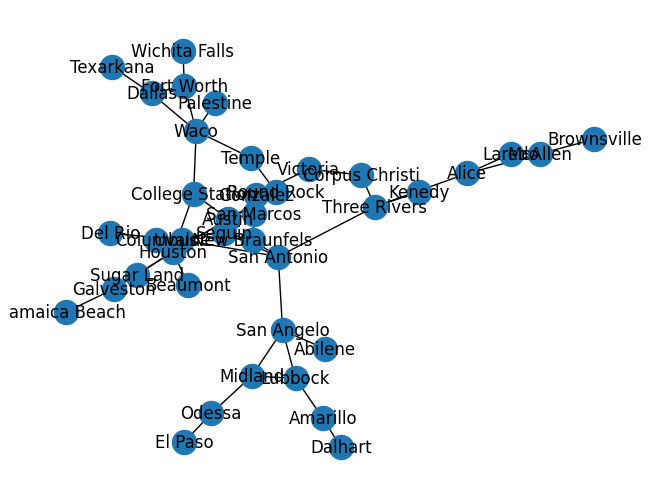

In [10]:
# Display a 2D graph of the given data.
graph = dict(graph)
# Create a new graph
G = nx.Graph()

# Add nodes and edges to the graph
for city, neighbors in graph.items():
    for neighbor in neighbors:
        G.add_edge(city, neighbor)

# Draw the graph
nx.draw(G, with_labels=True)
plt.show()

#Virus Spread - Uninformed Search Agent

##(40 points)

In this section, you will use the graph created in the previous section and create an *uninformed search* agent that will print the path how the virus will spread to all the provided Texas cities. The first confirmed case of the virus was in **Three Rivers** and starts spreading from there. The virus does not discriminate and it needs to spread to all the cities of Texas.

In the following code block, write code to implement **any** uninformed search strategy. You are free to create more code blocks if needed. As the output, print

*   The path or sequence of cities that will be infected by the spread of Coronavirus.
*   The distance travelled by the selected virus spreading strategy.

##Extra Credit (3 points)
On the 2D graph and the Texas state map, overlay the selected path along with the cities visited.

In [11]:
# Implement ANY uninformed search strategy for the spread of coronavirus from the starting city of 'Three Rivers'
# Initialize our graph as a dictionary of dictionaries
graph = defaultdict(dict)

# Read the connections between cities from distances.csv
with open(basePath + 'distances.csv', 'r') as file:
    reader = csv.reader(file)
    for row in reader:
        city1, city2, distance = row[0], row[1], float(row[2])
        graph[city1][city2] = distance
        graph[city2][city1] = distance # We do this twice because the graph is undirected

# Convert the defaultdict back to a regular dict
graph = dict(graph)

# Start the BFS from the first infected city
start_city = 'Three Rivers'

# A deque of cities to search, each item is a tuple of city name and distance from the starting city
queue = deque([(start_city, 0)])

# A dictionary to keep track of the cities we've visited and the total distance traveled
visited = {}

while queue:
    # Get the first city in the queue
    city, distance = queue.popleft()

    if city not in visited:
        # We've now visited this city
        visited[city] = distance
        print(f"Virus spread to {city}, total distance traveled: {distance}")

        # Add all its neighboring cities to the search queue
        for neighbor, neighbor_distance in graph[city].items():
            if neighbor not in visited:
                queue.append((neighbor, distance + neighbor_distance))

print(f"The virus spread to {len(visited)} cities.")

Virus spread to Three Rivers, total distance traveled: 0
Virus spread to San Antonio, total distance traveled: 74.50909807
Virus spread to Corpus Christi, total distance traveled: 81.17701954
Virus spread to Alice, total distance traveled: 51.26861733
Virus spread to Kenedy, total distance traveled: 33.25447966
Virus spread to San Angelo, total distance traveled: 285.35858017
Virus spread to New Braunfels, total distance traveled: 105.31786541
Virus spread to Seguin, total distance traveled: 108.50114391999999
Virus spread to Uvalde, total distance traveled: 157.2190374
Virus spread to Victoria, total distance traveled: 170.29887589999998
Virus spread to Laredo, total distance traveled: 149.81292837
Virus spread to McAllen, total distance traveled: 164.88425773
Virus spread to Midland, total distance traveled: 397.64200327
Virus spread to Lubbock, total distance traveled: 470.47215957
Virus spread to Abilene, total distance traveled: 380.62764993999997
Virus spread to San Marcos, total

#Vaccine Transportation - Informed Search Agent

##(40 points)

In this section, you will create an *informed search* agent that will be used to transport the vaccine. The city of **San Antonio** has more supply of vaccine than the demand. The goal is to create an **optimal strategy** to transport the vaccine and make it available at the highly affected city of **College Station**, where there is a shortage of vaccines.

In the following code block, write code to implement an **optimal** informed search strategy. You are free to create more code blocks if needed. As the output, print

*   The path / sequence of cities that will be visited in the optimal vaccine transportation strategy.
*   The total distance travelled in the optimal vaccine transportation strategy.


##Extra Credit (3 points)
On the 2D graph and the Texas state map, overlay the selected path along with the cities visited.

In [12]:
# Implement an OPTIMAL informed search strategy for distributing the vaccine from 'San Antonio' to 'College Station'
# Initialize our graph as a dictionary of dictionaries
graph = defaultdict(dict)

# Read the connections between cities from distances.csv
with open(basePath + 'distances.csv', 'r') as file:
    reader = csv.reader(file)
    for row in reader:
        city1, city2, distance = row[0], row[1], float(row[2])
        graph[city1][city2] = distance
        graph[city2][city1] = distance

# Convert the defaultdict back to a regular dict
graph = dict(graph)

# Let's assume we have a dictionary of heuristic distances to the goal city
heuristic_distances = defaultdict(int)  # Replace this with actual data if available

# Start the A* search from the vaccine supply city
start_city = 'San Antonio'
# The city where the vaccine is needed
goal_city = 'College Station'

# A priority queue of cities to search, each item is a tuple of estimated total cost, distance from the start city, and city name
queue = [(heuristic_distances[start_city], 0, start_city)]

# A dictionary to keep track of the cities we've visited and the total distance traveled
visited = {}

while queue:
    # Get the city in the queue with the lowest estimated total cost
    estimate, distance, city = heapq.heappop(queue)

    if city not in visited:
        # We've now visited this city
        visited[city] = distance
        print(f"Transported vaccine to {city}, total distance traveled: {distance}")

        if city == goal_city:
            break  # We can stop the search once we've reached the goal city

        # Add all its neighboring cities to the search queue
        for neighbor, neighbor_distance in graph[city].items():
            if neighbor not in visited:
                total_distance = distance + neighbor_distance
                estimate = total_distance + heuristic_distances[neighbor]
                heapq.heappush(queue, (estimate, total_distance, neighbor))

print(f"Transported vaccine to {len(visited)} cities.")


Transported vaccine to San Antonio, total distance traveled: 0
Transported vaccine to New Braunfels, total distance traveled: 30.80876734
Transported vaccine to Seguin, total distance traveled: 33.99204585
Transported vaccine to San Marcos, total distance traveled: 49.29825306
Transported vaccine to Gonzalez, total distance traveled: 67.41553815
Transported vaccine to Three Rivers, total distance traveled: 74.50909807
Transported vaccine to Austin, total distance traveled: 80.01567901
Transported vaccine to Uvalde, total distance traveled: 82.70993933
Transported vaccine to Round Rock, total distance traveled: 98.47968856
Transported vaccine to Kenedy, total distance traveled: 107.76357773
Transported vaccine to Columbus, total distance traveled: 123.59608533
Transported vaccine to Alice, total distance traveled: 125.77771539999999
Transported vaccine to Victoria, total distance traveled: 127.78784734999999
Transported vaccine to Temple, total distance traveled: 148.20358007
Transporte

#Submission Instructions

1.   Complete all tasks above - **File MUST contain the output for ALL cells**
2.   Export this notebook as .ipynb
      (File > Download as ipynb)
3.   Upload the .ipynb file on Blackboard

##Rubric

*   (45 points) Reading Data files & Creating a 2D Graph
*   (40 points) Virus Spread - Uninformed Search Agent
*   (40 points) Vaccine Transportation - Informed Search Agent
*   (10 points) Extra Credit - on the Texas map image, overlay the 2D graph and the paths selected by the search agents



